Jump to [Part 1](#Step1)


# Objectives:

Buying a house is a stressful process. We want to use machine learning to provide additional information. In this notebook, we want to build a model to predict the prices of residential homes in Ames, Iowa. This model will provide buyers with a rough estimate of what the houses are actually worth.


## This notebook is divided into 4 sections:
* Data Description
* Exploratory Data Analyis or EDA (in short)
    * Load and understand the data using pandas
    * Variable identification
    * Univariate analysis
        * Target variable analysis
        * Deal with Missing values
        * Generating new features
        * Transforming Categorical Variables using Scikit-Learn
        * Check skewness or distribution of numeric variables
        * Getting dummy categorical features.
    * Multivariate analysis
        * Correlation matrix
        * Relation Exploration for Few Numerical Variables and categorical features
        * Dealing with Outliers
* Feature selection using Wrapper Methods
    * Forward selection
* Preditct house prices (linear regression and XGBOOSTER)
    * About Linear Regression
    * Linear Regression using Statsmodels
    * Interpreting the Regression Results
    * Making Predictions based on the Regression Results
    * Predict house price using sklearn linear regression and XGBRegressor
        * Splitting the dataset into training and testing
        * Build models (Linear Regression and XGBRegressor)


# Data Description
The files given are:

1. train.csv: This is the dataset that we are gonna use to train our model to give predictions. SalePrice is theproperty's sale price in dollars. This is the target variable that we are trying to predict.
2. test.csv: The test set will be used to see how well our model performs on unseen data. For the test set, we do not provide the Target variable i.e, SalePrice. It is our job to predict these outcomes. For each passenger in the house, we use the model that we trained to predict the price of the house.
3. data_description.txt: This gives us the full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here.
4. sample_submission.csv: a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms. This serves as an example of how our submission should look like.

You can find all the files in the "House Prices - Advanced Regression Techniques" Kaggle competition url: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview

# Exploratory Data Analysis (EDA)

## Importing the Libraries

In [1]:
import numpy as np                 # linear algebra
import pandas as pd                # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats            # for some statistics
from scipy.stats import norm, skew # for some statistics
import seaborn as sns              # plot
import matplotlib.pyplot as plt    # plot
%matplotlib inline

## Load and understand the dataset using pandas

This is how we assign the datasets to variables in python using pandas.

In [2]:
# load train data
df_train = pd.read_csv("https://raw.githubusercontent.com/bloominstituteoftechnology/ds_code_along_unit_1/main/assets/train.csv")
# display data
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
# Load Test data
df_test = pd.read_csv("https://raw.githubusercontent.com/bloominstituteoftechnology/ds_code_along_unit_1/main/assets/test.csv")
# display test data
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


***Print the first five rows of the dataset***

In [4]:
# We will use the .head() function to display the first five columns of the dataset to get a feel of the dataset.
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


***Print last 5 rows of the dataset***

In [5]:
df_train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


***Find out the total number of rows and columns of the data set***

In [6]:
df_train.shape

(1460, 81)

***Find out the columns, data types, and presence of null values or missing values in the data set***

In [7]:
#info gives us information about index and column data types.
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

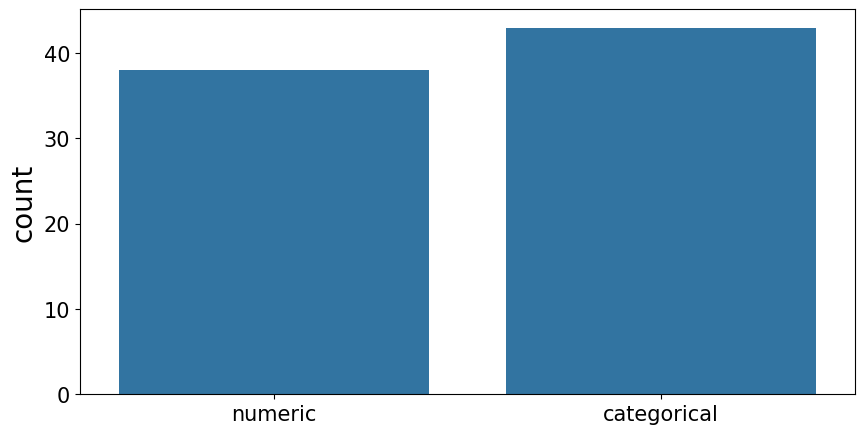

In [8]:
# Checking how many column have a categorical and numerical data type
column_data_type = []
for col in df_train.columns:
    data_type = df_train[col].dtype
    if df_train[col].dtype in ['int64','float64']:
        column_data_type.append('numeric')
    else:
        column_data_type.append('categorical')
plt.figure(figsize=(10,5))
size=20
params = {'legend.fontsize': 'large',
          'figure.figsize': (20,8),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
          'axes.titlepad': 25}
plt.rcParams.update(params)
sns.countplot(x=column_data_type)
plt.show()

In [9]:
print("{} numbers of columns have a numerical data type" .format(column_data_type.count('numeric')))
print("{} numbers of columns have a categorical data type" .format(column_data_type.count('categorical')))

38 numbers of columns have a numerical data type
43 numbers of columns have a categorical data type


## Variable identification

***The goal is to predict house prices, so the target variable (or dependent variable) is "SalePrice", where the rest of the columns might be considered as predictor variables (independent variables).***


### Deal with Missing values

In [10]:
# check the number of missing values in each column
df_train.isna().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


Let us look at the percentage of the missing values of the dataset.

In [11]:
# another way to present missing values in each column
missing_values = df_train.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending = False)
missing_values
NAN_col = list(missing_values.to_dict().keys())
missing_values_data = pd.DataFrame(missing_values)
missing_values_data.reset_index(level=0, inplace=True)
missing_values_data.columns = ['Feature','Number of Missing Values']
missing_values_data['Percentage of Missing Values'] = (100.0*missing_values_data['Number of Missing Values'])/len(df_train)
missing_values_data

,Feature,Number of Missing Values,Percentage of Missing Values
0,PoolQC,1453,99.520548
1,MiscFeature,1406,96.301370
2,Alley,1369,93.767123
3,Fence,1179,80.753425
4,MasVnrType,872,59.726027
5,FireplaceQu,690,47.260274
6,LotFrontage,259,17.739726
7,GarageType,81,5.547945
8,GarageYrBlt,81,5.547945
9,GarageFinish,81,5.547945


### impute the missing values onto the features

***1. We will impute the Nan or null values of 'PoolQC' with None because there are about 99.5% null values, which means that most houses don't have a Pool.***



In [12]:
df_train["PoolQC"] = df_train["PoolQC"].fillna("None")

***2 We will impute the Nan or null values of 'MiscFeature' with None because there are about 96.3% null values, which means that most houses don't contain miscellaneous Features.***

In [13]:
df_train["MiscFeature"] = df_train["MiscFeature"].fillna("None")

***3.We will impute the Nan or null values of 'Alley' which refers to type of Alley access with None as null values signify that the house does not contain any Alley access.***

In [14]:
df_train["Alley"] = df_train["Alley"].fillna("None")

***4.We will impute the Nan or null values of 'Fence' with None as null values signify that the house does not contain any Fences.***

In [15]:
df_train["Fence"] = df_train["Fence"].fillna("None")

***5.We will impute the Nan or null values of 'FireplaceQu' with None as null values signify that the house does not contain any fireplace.***

In [16]:
df_train["FireplaceQu"] = df_train["FireplaceQu"].fillna("None")

***6.We will impute the Nan or null values of 'LotFrontage' with median values taking into consideration that the area of each street connected to the house property is most likely similar to other houses of the Neighborhood.***

In [17]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
df_train["LotFrontage"] = df_train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

***7.We replace the 'GarageType', 'GarageFinish', 'GarageQual' and 'GarageCond' missing values into None signifying that those homes most likely don't have any garage for vehicles.***

In [18]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df_train[col] = df_train[col].fillna('None')

***8.We replace the null values of 'GarageYrBlt', 'GarageArea', 'GarageCars' as no garage equals no cars.***

In [19]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df_train[col] = df_train[col].fillna(0)

***9. The missing values of 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath' are filled with zero because the null values most likely signifies no basement.***

In [20]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df_train[col] = df_train[col].fillna(0)

***10.The missing values'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2 are filled with Nonne as NaN values signifies no basement.***

In [21]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df_train[col] = df_train[col].fillna('None')

***11.The NA values of "MasVnrType" and "MasVnrArea" refer to no masonry veneer for these houses. Therefore the Area can be imputed with zero and the type can be imputed with None.***

In [22]:
df_train["MasVnrType"] = df_train["MasVnrType"].fillna("None")
df_train["MasVnrArea"] = df_train["MasVnrArea"].fillna(0)

***12. The 'MSZoning' refers to the general zoning classification. We fill the NaN values with 'RL' which is the most occurring value.***

In [23]:
df_train['MSZoning'] = df_train['MSZoning'].fillna(df_train['MSZoning'].mode()[0])

***13.Most of the values of this feature are "AllPub" except for one "NoSeWa" and 2 NA. Since the house with "NoSewa' is present in the training set, this feature is not helpful in predictive modeling so we drop it.***

In [24]:
df_train = df_train.drop(['Utilities'], axis=1)

***14.The NA values means typical which is mentioned in the data description.***

In [25]:
df_train["Functional"] = df_train["Functional"].fillna("Typ")

***15.There is only one NA value present here in "Electrical" so we impute it 'SBrkr' since it is the most occurring value.***

In [26]:
df_train['Electrical'] = df_train['Electrical'].fillna(df_train['Electrical'].mode()[0])

***16.There is only one NA value present here in "KitchenQual" so we impute it 'TA' since it is the most occurring value.***

In [27]:
df_train['KitchenQual'] = df_train['KitchenQual'].fillna(df_train['KitchenQual'].mode()[0])

***17.There is only one NA value present in both Exterior1st and Exterior2nd so we fill it with the most frequent string.***

In [28]:
df_train['Exterior1st'] = df_train['Exterior1st'].fillna(df_train['Exterior1st'].mode()[0])
df_train['Exterior2nd'] = df_train['Exterior2nd'].fillna(df_train['Exterior2nd'].mode()[0])

***18.Fill it again with the most frequent which is "WD" in this case.***

In [29]:
df_train['SaleType'] = df_train['SaleType'].fillna(df_train['SaleType'].mode()[0])

***19.The NA values here refers to No Building class so we fill it with None.***

In [30]:
df_train['MSSubClass'] = df_train['MSSubClass'].fillna("None")

In [31]:
# Checking the maximum of null variable it have
df_train.isnull().sum().max()

0

The result 0 above shows we no longer have any missing values.

### Generating new features

We can generate some new features from existing ones.

***1. the total square feet of the house can be computed as: Total_Square_Feet = BsmtFinSF1 + BsmtFinSF2 + 1stFlrSF + 2ndFlrSF + TotalBsmtSF***

In [32]:
df_train['Total_Square_Feet'] = (df_train['BsmtFinSF1'] + df_train['BsmtFinSF2'] + df_train['1stFlrSF'] +
                                                                 df_train['2ndFlrSF'] + df_train['TotalBsmtSF'])

***2.Total number of Baths in the house can be computed as: Total_Bath = FullBath + 0.5 * HalfBath + BsmtFullBath + 0.5*BsmtHalfBath***

In [33]:
df_train['Total_Bath'] = (df_train['FullBath'] + (0.5 * df_train['HalfBath']) + df_train['BsmtFullBath'] +
                                                                  (0.5 * df_train['BsmtHalfBath']))

***3.Total_Porch_Area can be computed as: Total_Porch_Area = OpenPorchSF + 3SsnPorch + EnclosedPorch + ScreenPorch + WoodDeckSF***

In [34]:
df_train['Total_Porch_Area'] = (df_train['OpenPorchSF'] + df_train['3SsnPorch'] +
                                df_train['EnclosedPorch'] + df_train['ScreenPorch'] + df_train['WoodDeckSF'])

***4.the size of per room in the house can be computed as: SqFtPerRoom =  GrLivArea/(TotRmsAbvGrd + FullBath + HalfBath + KitchenAbvGr***

In [35]:
df_train['SqFtPerRoom'] = df_train['GrLivArea'] / (df_train['TotRmsAbvGrd'] + df_train['FullBath'] +
                                                       df_train['HalfBath'] + df_train['KitchenAbvGr'])

### Transforming Categorical Variables using Scikit-Learn



In [36]:
#MSSubClass=The building class
df_train['MSSubClass'] = df_train['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
df_train['OverallCond'] = df_train['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
df_train['YrSold'] = df_train['YrSold'].astype(str)
df_train['MoSold'] = df_train['MoSold'].astype(str)

In [37]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond',
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1',
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond',
        'YrSold', 'MoSold')

# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(df_train[c].values))
    df_train[c] = lbl.transform(list(df_train[c].values))

# shape
print('Shape all_data: {}'.format(df_train.shape))

Shape all_data: (1460, 84)


In [38]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Total_Square_Feet,Total_Bath,Total_Porch_Area,SqFtPerRoom
0,1,9,RL,65.0,8450,1,1,3,Lvl,Inside,...,0,4,2,WD,Normal,208500,3272,3.5,61,142.500000
1,2,4,RL,80.0,9600,1,1,3,Lvl,FR2,...,0,7,1,WD,Normal,181500,3502,2.5,298,140.222222
2,3,9,RL,68.0,11250,1,1,0,Lvl,Inside,...,0,11,2,WD,Normal,223500,3192,3.5,42,178.600000
3,4,10,RL,60.0,9550,1,1,0,Lvl,Corner,...,0,4,0,WD,Abnorml,140000,2689,2.0,307,190.777778
4,5,9,RL,84.0,14260,1,1,0,Lvl,FR2,...,0,3,2,WD,Normal,250000,3998,3.5,276,169.076923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,9,RL,62.0,7917,1,1,3,Lvl,Inside,...,0,10,1,WD,Normal,175000,2600,2.5,40,149.727273
1456,1457,4,RL,85.0,13175,1,1,3,Lvl,Inside,...,0,4,4,WD,Normal,210000,4568,3.0,349,207.300000
1457,1458,10,RL,66.0,9042,1,1,3,Lvl,Inside,...,2500,7,4,WD,Normal,266500,3767,2.0,60,195.000000
1458,1459,4,RL,68.0,9717,1,1,3,Lvl,Inside,...,0,6,4,WD,Normal,142125,3234,2.0,478,154.000000


### Check skewness or distribution of numeric variables

In [39]:
# find all the columsn of numeric variables
numeric_feats = df_train.dtypes[df_train.dtypes != "object"].index

In [40]:
numeric_feats

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscVal', 'MoSold',
       'YrSold', 'SalePrice', 'Total_Square_Feet', 'Total_Bath',
       'Total_Porch_Area', 'SqFtPerRoom'],
      dtype='object')

In [41]:
# Check the skew of all numerical features
skewed_feats = df_train[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,24.451640
PoolArea,14.813135
LotArea,12.195142
3SsnPorch,10.293752
LowQualFinSF,9.002080
LandSlope,4.808735
KitchenAbvGr,4.483784
BsmtFinSF2,4.250888
ScreenPorch,4.117977
BsmtHalfBath,4.099186


***We find the skewed features and then perform Box Cox Transformation of highly skewed features.***

In [42]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    df_train[feat] = boxcox1p(df_train[feat], lam)


There are 64 skewed numerical features to Box Cox transform


### Getting dummy categorical features

In [43]:
#Getting dummy categorical features.
df_train = pd.get_dummies(df_train)
print(df_train.shape)

(1460, 226)


In [44]:
df_train.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.730463,2.750250,5.831328,19.212182,0.730463,0.730463,1.540963,0.0,2.440268,1.820334,...,False,False,False,True,False,False,False,False,True,False
1,1.194318,1.820334,6.221214,19.712205,0.730463,0.730463,1.540963,0.0,2.259674,2.440268,...,False,False,False,True,False,False,False,False,True,False
2,1.540963,2.750250,5.914940,20.347241,0.730463,0.730463,0.000000,0.0,2.440268,1.820334,...,False,False,False,True,False,False,False,False,True,False
3,1.820334,2.885846,5.684507,19.691553,0.730463,0.730463,0.000000,0.0,2.440268,1.820334,...,False,False,False,True,True,False,False,False,False,False
4,2.055642,2.750250,6.314735,21.325160,0.730463,0.730463,0.000000,0.0,2.602594,1.820334,...,False,False,False,True,False,False,False,False,True,False


<hr style="border:2px solid gray">


<font color='orange'>


<a name= "Step1"></a>
    
## Ensure you've properly connected your dataset and run the previous cells in this notebook.

## Univariate Analysis

***Target Variable Analysis***

***Check the distribution of the Sale Price variable***

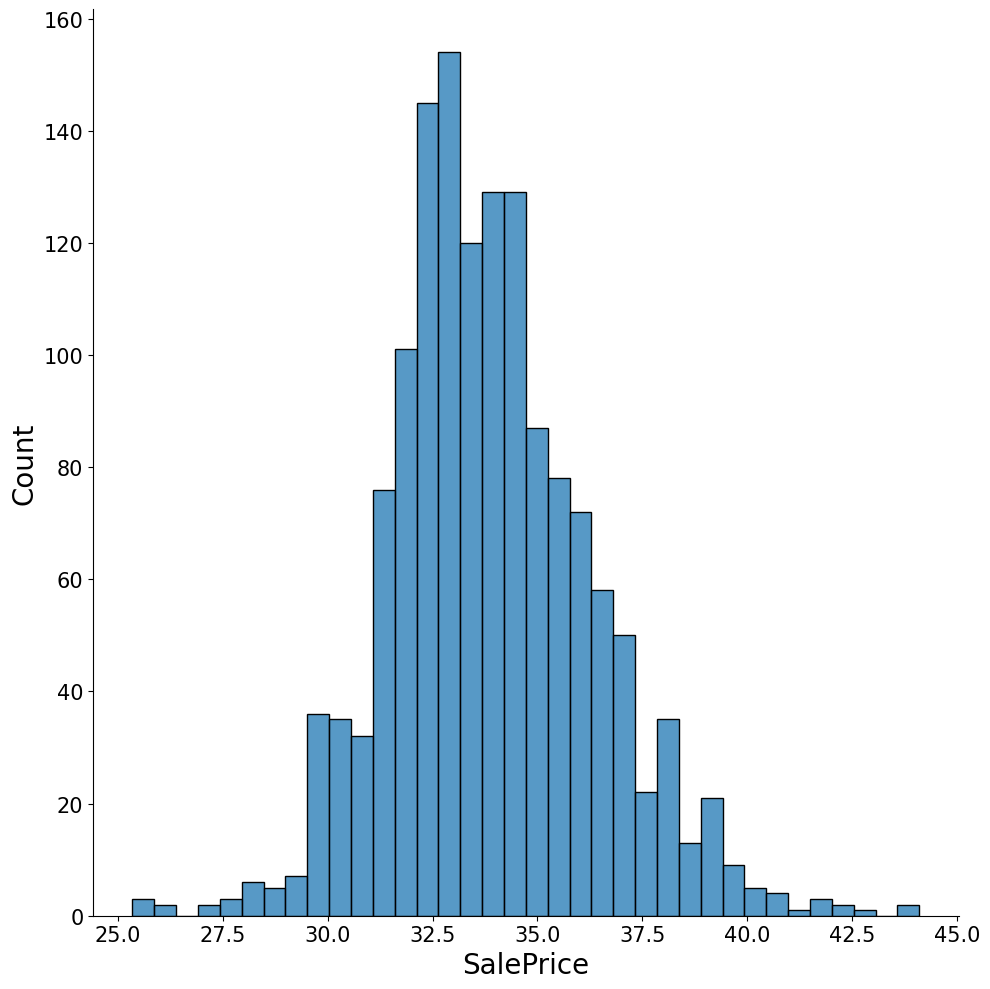

In [66]:
sns.displot(df_train['SalePrice'], height=10)

Text(0.5, 1.0, 'SalePrice distribution')

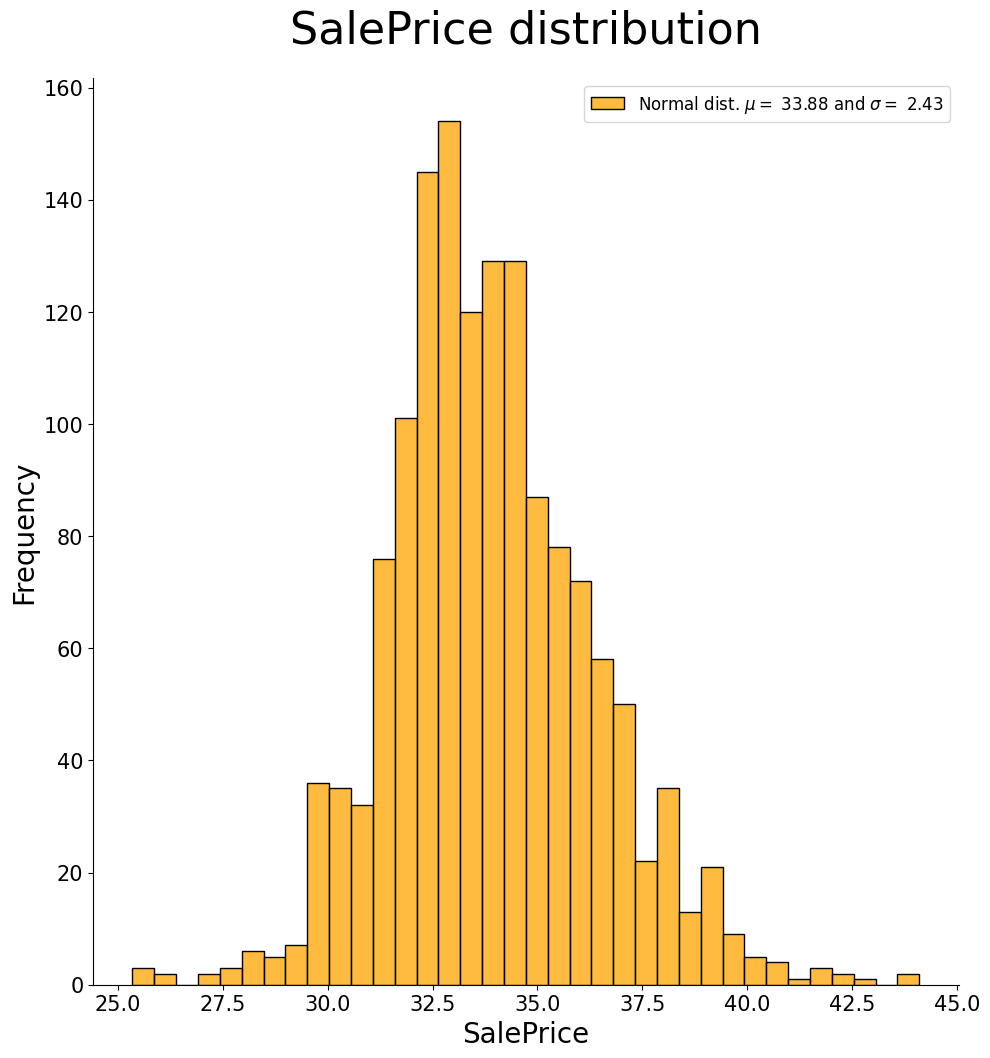

In [68]:
sns.displot(df_train['SalePrice'], height=10, color='orange')
# Get the fitted parameters used by the function
mu, sigma = norm.fit(df_train['SalePrice'])

# Now plot the distribution
plt.legend([f"Normal dist. $\mu=$ {round(mu, 2)} and $\sigma=$ {round(sigma, 2)}"], loc="best")
plt.ylabel("Frequency")
plt.title("SalePrice distribution", fontsize = 32)

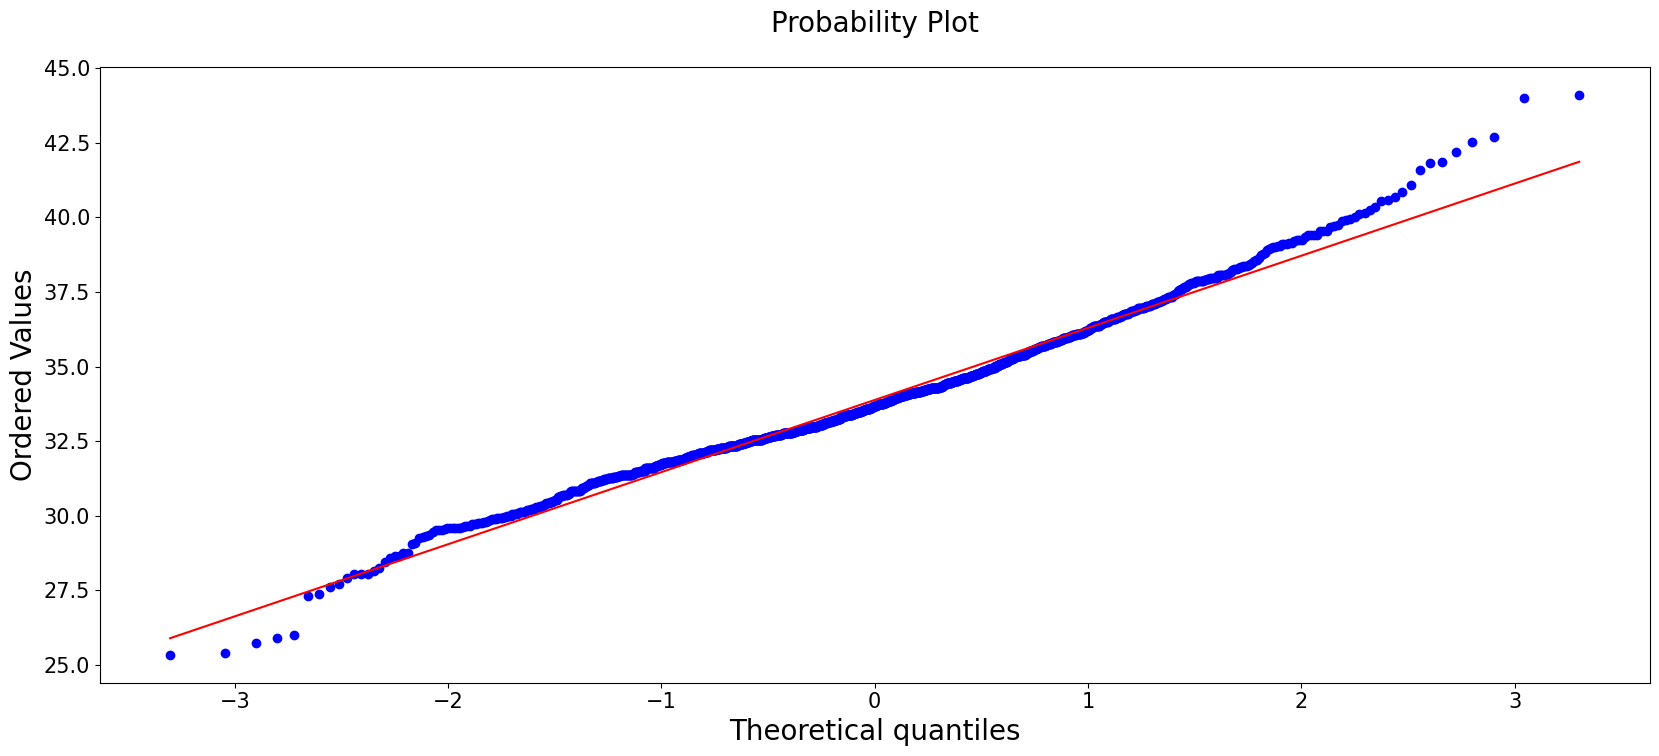

In [69]:
# Get the QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

# Multivariate Analysis

### Correlation matrix

<Axes: >

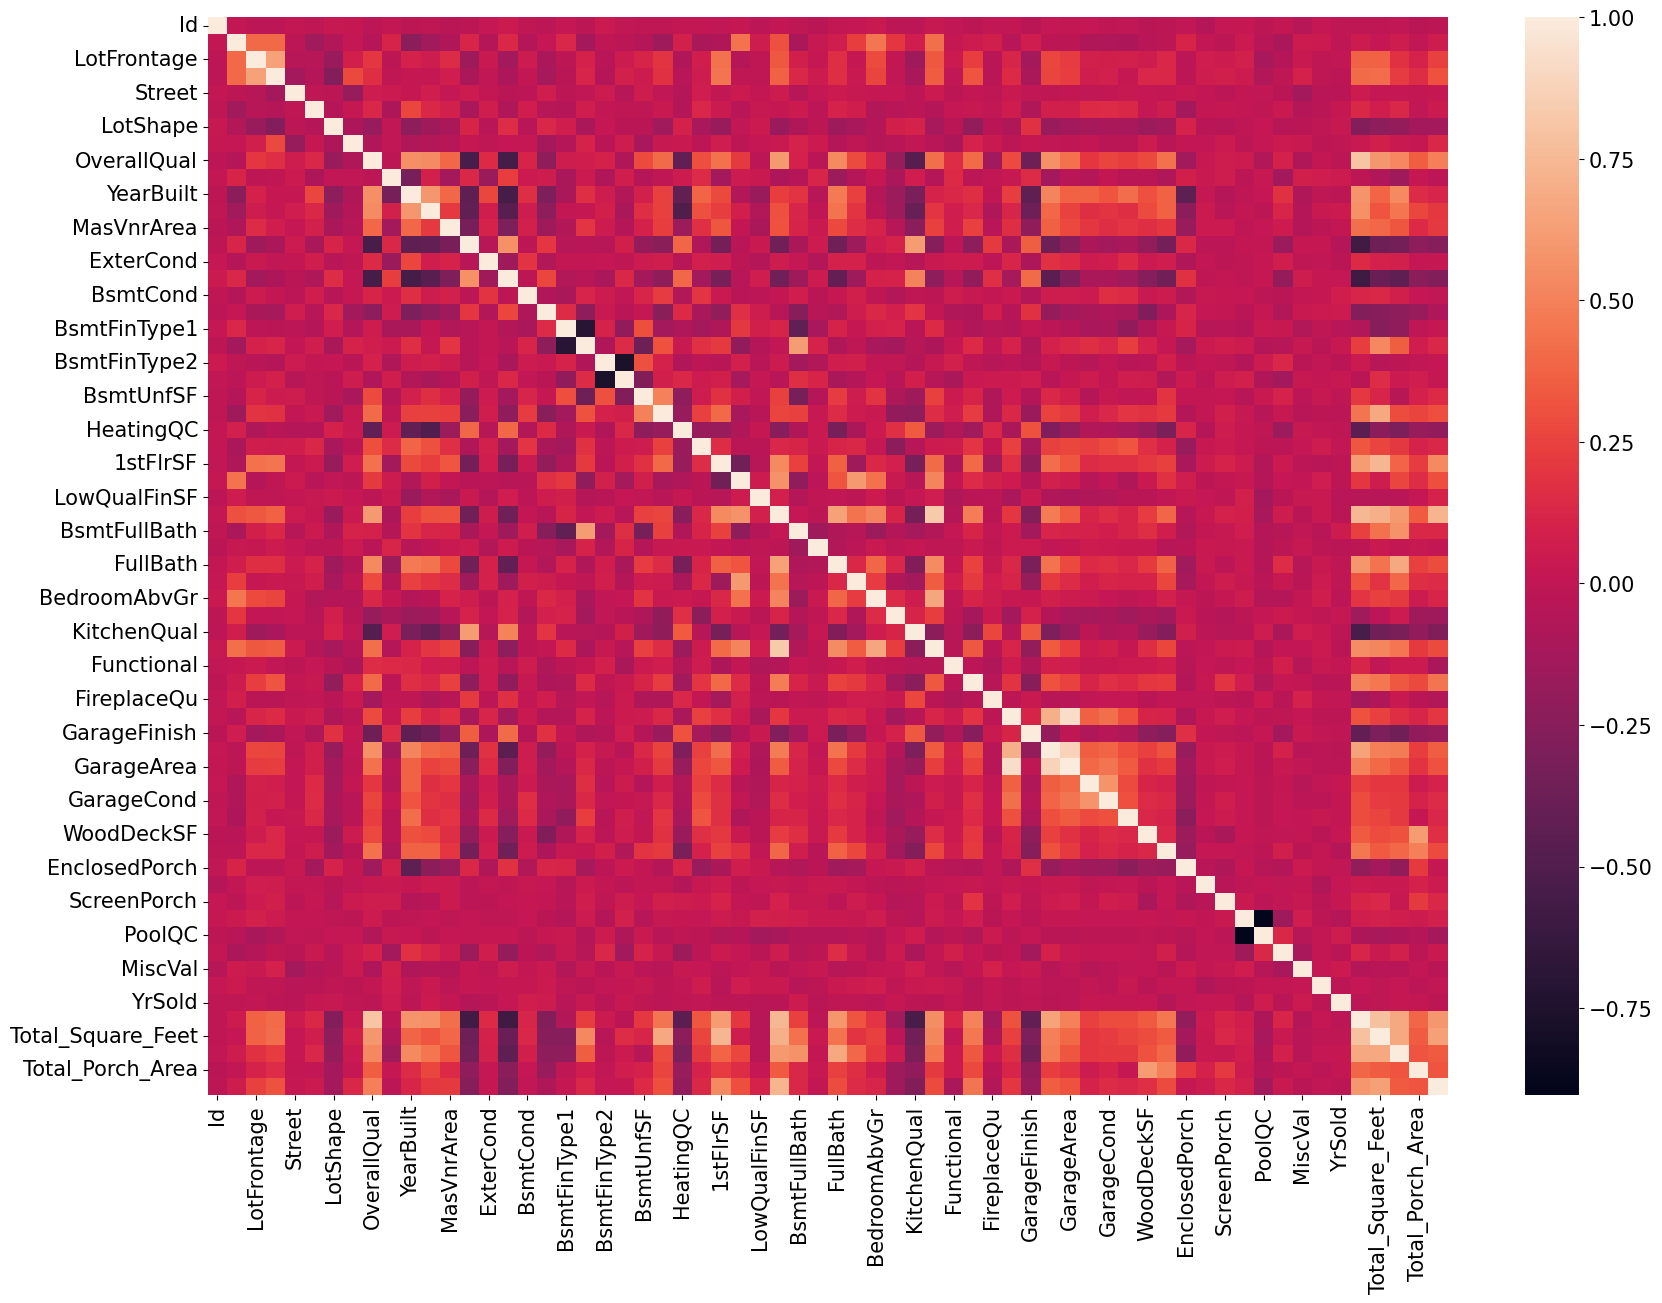

In [71]:
# compute and plot the correlation matrix
plt.figure(figsize=(20,14))
sns.heatmap(df_train.corr())

<Axes: >

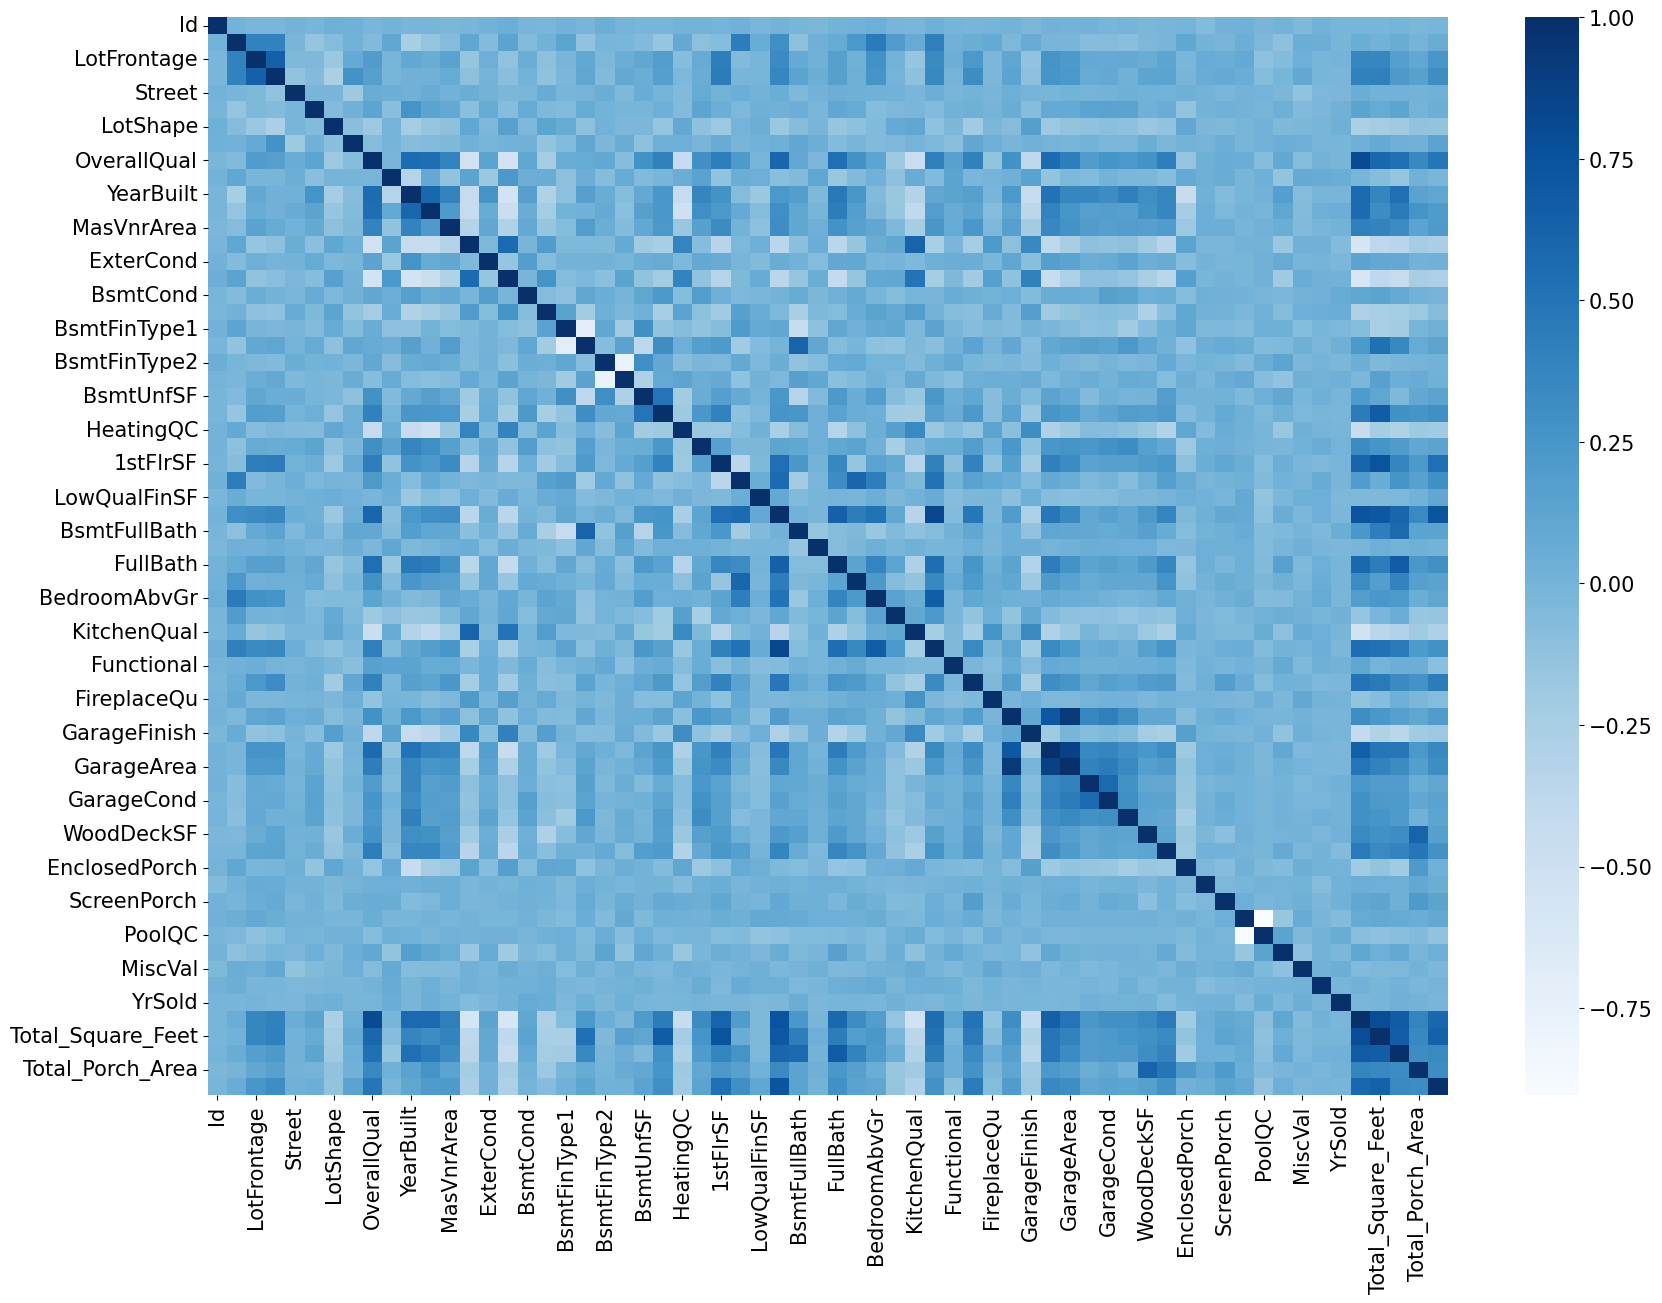

In [72]:
# compute and plot the correlation matrix
plt.figure(figsize=(20,14))
sns.heatmap(df_train.corr(), cmap='Blues')

<Axes: >

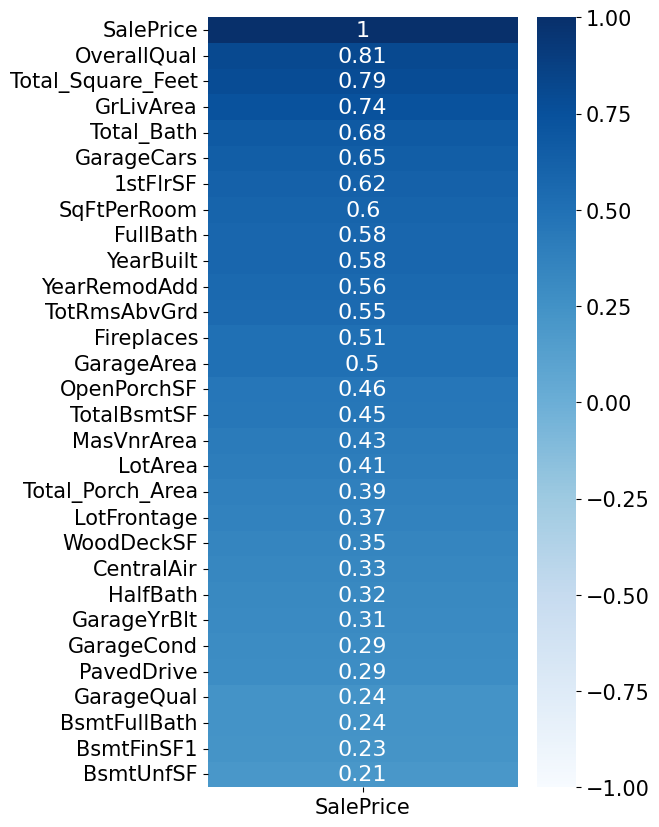

In [82]:
# Checking the correlation between the predicted and training column
top_features = df_train.corr()[['SalePrice']].sort_values(by=['SalePrice'], ascending=False).head(30)
plt.figure(figsize=(5,10))
sns.heatmap(top_features, cmap='Blues', annot=True, annot_kws={"size": 16}, vmin=-1)



#<font color = 'orange'> STOP HERE

### Relation Exploration for Few Numerical Variables and categorical features

In [45]:
# Making Function for plotting and checking the relation between two columns
def plot_data(col, discrete=False):
    if discrete:
        fig, ax = plt.subplots(1,2,figsize=(14,6))
        sns.stripplot(x=col, y='SalePrice', data=df_train, ax=ax[0])
        sns.countplot(df_train[col], ax=ax[1])
        fig.suptitle(str(col) + ' Analysis')
    else:
        fig, ax = plt.subplots(1,2,figsize=(12,6))
        sns.scatterplot(x=col, y='SalePrice', data=df_train, ax=ax[0])
        sns.distplot(df_train[col], kde=False, ax=ax[1])
        fig.suptitle(str(col) + ' Analysis')

#### Relation Exploration for Few Numerical Variables

/tmp/ipython-input-45-2346589752.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], kde=False, ax=ax[1])


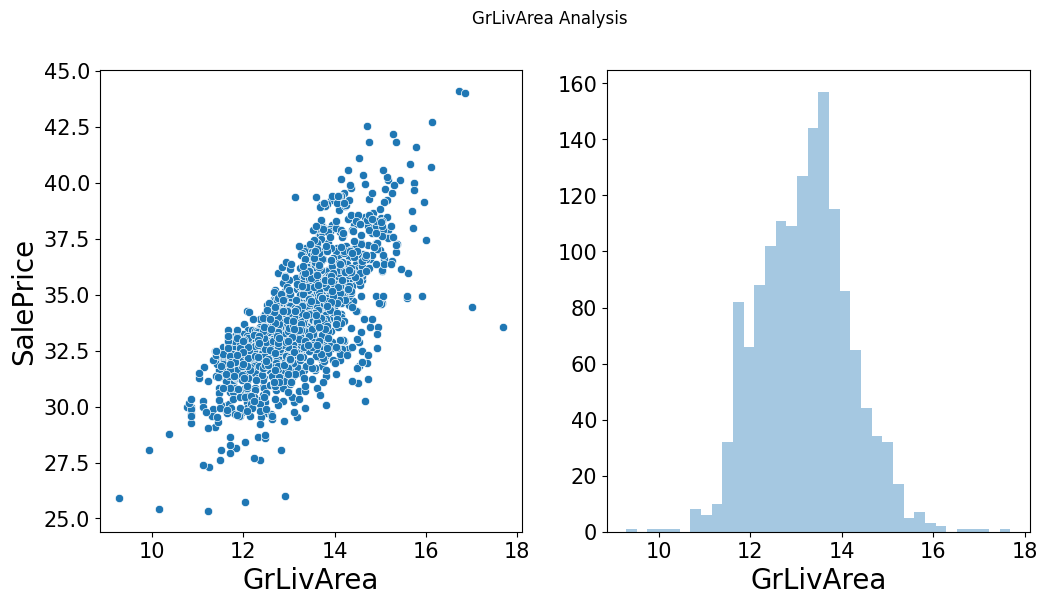

In [46]:
plot_data('GrLivArea')

'GrLivArea' seem to be linearly related with 'SalePrice'. The relationship is positive, which means that as one variable increases, the other also increases.

/tmp/ipython-input-45-2346589752.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], kde=False, ax=ax[1])


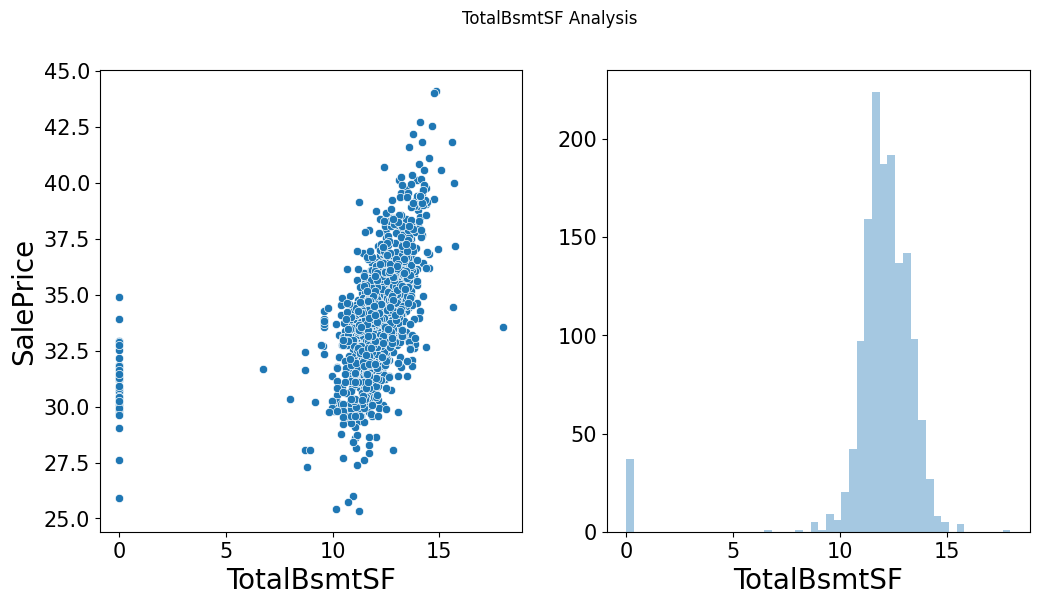

In [47]:
plot_data('TotalBsmtSF')

'TotalBsmtSF' also seem to be linearly related with 'SalePrice'. The relationship is positive, which means that as one variable increases, the other also increases. However, it has outliers so we need to move them.

In [48]:
df_train = df_train.drop(df_train[(df_train['TotalBsmtSF'] > 3000) & (df_train['SalePrice'] < 400000)].index)

####  Relation Exploration for categorical features

Text(0.5, 0.98, 'BsmtFinType2 Analysis')

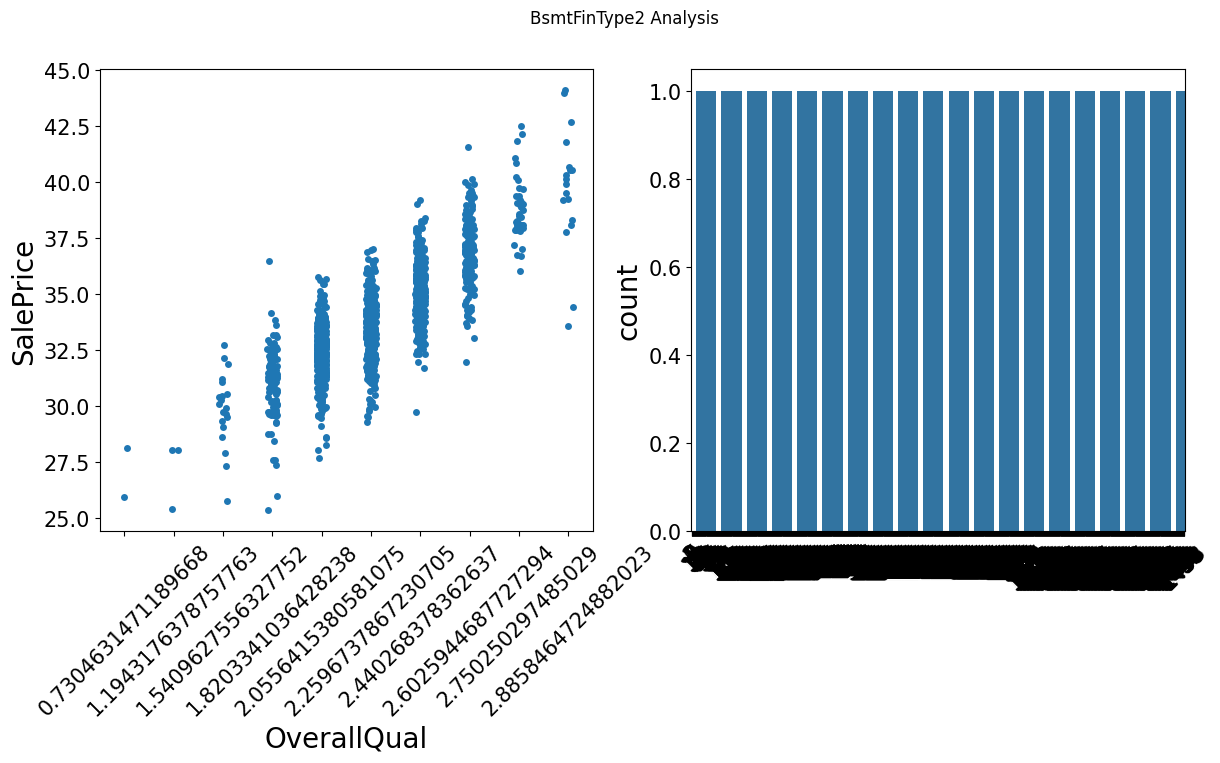

In [49]:
# plot saleprice vs. overallqual
fig, ax = plt.subplots(1,2,figsize=(14,6))
sns.stripplot(x='OverallQual', y='SalePrice', data=df_train, ax=ax[0])
ax[0].tick_params(axis='x', labelrotation = 45)
sns.countplot(df_train['OverallQual'], ax=ax[1])
ax[1].tick_params(axis='x', labelrotation = 45)
fig.suptitle(str(col) + ' Analysis')

In [50]:
# drop off the outliers
df_train = df_train.drop(df_train[(df_train['OverallQual'] == 10) & (df_train['SalePrice'] < 200000)].index)

/tmp/ipython-input-45-2346589752.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], kde=False, ax=ax[1])


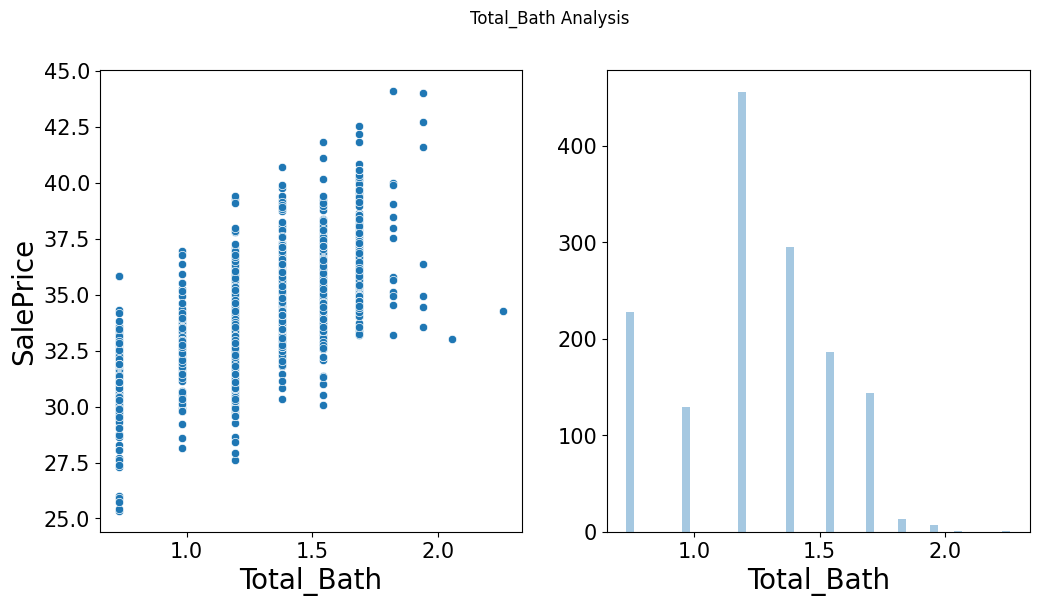

In [51]:
# plot saleprices vs total_bath
plot_data('Total_Bath')

In [52]:
# Dropping the outliers in the data
df_train = df_train.drop(df_train[(df_train['Total_Bath'] > 4) & (df_train['SalePrice'] < 200000)].index)

In [53]:
df_train.reset_index()

,index,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0.730463,2.750250,5.831328,19.212182,0.730463,0.730463,1.540963,0.0,2.440268,...,False,False,False,True,False,False,False,False,True,False
1,1,1.194318,1.820334,6.221214,19.712205,0.730463,0.730463,1.540963,0.0,2.259674,...,False,False,False,True,False,False,False,False,True,False
2,2,1.540963,2.750250,5.914940,20.347241,0.730463,0.730463,0.000000,0.0,2.440268,...,False,False,False,True,False,False,False,False,True,False
3,3,1.820334,2.885846,5.684507,19.691553,0.730463,0.730463,0.000000,0.0,2.440268,...,False,False,False,True,True,False,False,False,False,False
4,4,2.055642,2.750250,6.314735,21.325160,0.730463,0.730463,0.000000,0.0,2.602594,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,13.213850,2.750250,5.744420,18.960528,0.730463,0.730463,1.540963,0.0,2.259674,...,False,False,False,True,False,False,False,False,True,False
1456,1456,13.215896,1.820334,6.337529,20.994868,0.730463,0.730463,1.540963,0.0,2.259674,...,False,False,False,True,False,False,False,False,True,False
1457,1457,13.217941,2.885846,5.859551,19.476345,0.730463,0.730463,1.540963,0.0,2.440268,...,False,False,False,True,False,False,False,False,True,False
1458,1458,13.219985,1.820334,5.914940,19.760176,0.730463,0.730463,1.540963,0.0,2.055642,...,False,False,False,True,False,False,False,False,True,False


## Deal with outliers

In [54]:
from sklearn.ensemble import IsolationForest #isolation forest for the remove outliers

clf = IsolationForest(max_samples = 100, random_state = 42)
clf.fit(df_train)
y_noano = clf.predict(df_train)
y_noano = pd.DataFrame(y_noano, columns = ['Top'])
y_noano[y_noano['Top'] == 1].index.values

df_train = df_train.iloc[y_noano[y_noano['Top'] == 1].index.values]
df_train.reset_index(drop = True, inplace = True)
print("Number of Outliers:", y_noano[y_noano['Top'] == -1].shape[0])
print("Number of rows without outliers:", df_train.shape[0])

Number of Outliers: 12
Number of rows without outliers: 1448


# Feature selection using Wrapper Methods

* In wrapper methods, we try to use a subset of features and train a model using them. Based on the inferences that we draw from the previous model, we decide to add or remove features from the subset. The problem is essentially reduced to a search problem. These methods are usually computationally very expensive.

* Some common examples of wrapper methods are

<ol>
    <li>Forward selection,</li>
<li>Backward elimination,</li>
<li>Exhaustive feature selection,</li>
<li>Recursive feature elimination.</li>
<li>Recursive feature elimination with cross-validation</li>
</ol>


We will only demonstrate the Step Forward feature selection algorithm from mlxtend on the train dataset for this project.

In [55]:
# step forward feature selection

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [56]:
df_train.shape

(1448, 226)

In [57]:
# In practice, feature selection should be done after data pre-processing,
# so ideally, all the categorical variables are encoded into numbers,
# and then you can assess how deterministic they are of the target

# here for simplicity I will use only numerical variables
# select numerical columns:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(df_train.select_dtypes(include=numerics).columns)
df_train = df_train[numerical_vars]
df_train.shape

(1448, 64)

In [58]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df_train.drop(labels=['SalePrice'], axis=1),
    df_train['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1013, 63), (435, 63))

In [59]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  3


In [60]:
# removed correlated  features
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((1013, 60), (435, 60))

In [61]:
X_train.fillna(0, inplace=True)

In [62]:
# step forward feature selection

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(RandomForestRegressor(),
           k_features=10,
           forward=True,
           floating=False,
           verbose=2,
           scoring='r2',
           cv=3)

sfs1 = sfs1.fit(np.array(X_train), y_train)

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   24.1s
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   38.5s finished

[2025-06-23 15:09:52] Features: 1/10 -- score: 0.6764895553160587[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   37.6s
[Parallel(n_jobs=1)]: Done  59 out of  59 | elapsed:   47.4s finished

[2025-06-23 15:10:39] Features: 2/10 -- score: 0.764926873236064[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   32.1s
[Parallel(n_jobs=1)]: Done  58 out of  58 | elapsed:   46.8s finished

[2025-06-23 15:11:26] Features: 3/10 -- score: 0.8130103966880089

AttributeError: 'Parallel' object has no attribute '_pre_dispatch_amount'

In [ ]:
sfs1.k_feature_idx_

In [ ]:
X_train.columns[list(sfs1.k_feature_idx_)]

We can see that forward feature selection results in the above columns being selected from all the given columns.

## Predict house prices

### Linear Regression

Assume that there is a linear relationship between the dependent variable and the independent variable/s, then we can use the linear regression as a predictive model.

For this project, $Y$ (dependent variable) is the house price ('SalePrice') which we want to predict, and $X_1, X_2, \cdots$ (independent variables) which are the features of the house (based on feature selection above, these top features are:
- 'MSSubClass',
- 'OverallQual',
- 'OverallCond',
- 'BsmtUnfSF',
- 'HeatingQC',
- 'KitchenQual',
- 'Fireplaces',
- 'GarageCars',
- 'Total_Square_Feet',
- 'Total_Bath'

In [ ]:
# only include the important feature in your training data X
X = df_train[X_train.columns[list(sfs1.k_feature_idx_)]]

In [ ]:
X.head()

In [ ]:
# target variable is SalePrice
y = df_train['SalePrice'].values

In [ ]:
X.shape,y.shape

### Linear Regression using Statsmodels

In [ ]:
import statsmodels.api as sm

X = sm.add_constant(X) # adding a constant

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

print_model = model.summary()
print(print_model)

### Interpreting the Regression Results

Here are several important components within the results:

* Adjusted. R-squared reflects the fit of the model. R-squared values range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.

* const coefficient is your Y-intercept. It means that if all the coefficients of the features ('MSSubClass', 'OverallQual', 'OverallCond', 'BsmtUnfSF', 'HeatingQC','KitchenQual', 'Fireplaces', 'GarageCars', 'Total_Square_Feet','Total_Bath') are zero, then the expected output (i.e., the Y) would be equal to the const coefficient.

* MSSubClass coefficient represents the change in the output Y due to a change of one unit in the MSSubClass (everything else held constant). The same applies to the other feature coefficients.


* std err reflects the level of accuracy of the coefficients. The lower it is, the higher is the level of accuracy

* $P >|t|$ is your p-value. A p-value of less than 0.05 is considered to be statistically significant

* Confidence Interval represents the range in which our coefficients are likely to fall (with a likelihood of 95%)\

### Making Predictions based on the Regression Results

Recall that the equation for the Multiple Linear Regression is:

$$ Y = B_0 + B_1 X_1 + B_2 X_2 + \cdots $$

So for our example, it would look like this:

$$ \text{sale_price = (const coef) + (MSSubClass coef) $X_1$ + (OverallQual coef) $X_2$ + (OverallCond coef) $X_3$ + (BsmtUnfSF coef) $X_4$}$$
$$ \text{+ (HeatingQC coef) $X_5$ + (KitchenQual coef) $X_6$ + (Fireplaces coef) $X_7$} $$
$$ \text{+ (GarageCars coef) $X_8$ + (Total_Square_Feet coef) $X_9$ + (Total_Bath coef) $X_{10}$} $$



For further information about the statsmodels module, please refer to the statsmodels documentation: https://www.statsmodels.org/stable/index.html


### Predict house price using sklearn linear regression and XGBRegressor

#### Splitting the dataset into training and testing

In [ ]:
# 80% training, 20% testing
x_train, x_test,y_train,y_test = train_test_split(X,y,test_size =0.2)

print('x_train: ', x_train.shape)
print('x_test: ', x_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

#### Build models (Linear Regression and XGBRegressor)

In [ ]:
pip install xgboost

In [ ]:
# import packages
from sklearn.linear_model import LinearRegression # linear regression
from xgboost import XGBRegressor # XGboost
from sklearn.metrics import mean_squared_error # mean square error (metric used to evaulate model)

In [ ]:
# Model selection and implimentation (linear regression)
reg = LinearRegression().fit(x_train,y_train)

In [ ]:
reg.score(x_train,y_train)

In [ ]:
reg.coef_

In [ ]:
reg.intercept_

In [ ]:
predicted_reg = reg.predict(x_test)

In [ ]:
# Model Evaluation
mean_squared_error(y_test, predicted_reg)

In [ ]:
## making predictions using the XGBoost algorithm

xg_model = XGBRegressor(n_estimators=100)
xg_model.fit(x_train, y_train)
predicted_XGBoost = xg_model.predict(x_test)


In [ ]:
xg_model.score(x_train,y_train)

In [ ]:

# Model Evaluation
mean_squared_error(y_test, predicted_XGBoost)